### GRIP : The Spark Foundation - INTERNSHIP November-2021

##### Data Science and Business Analytics Intern

##### Author : Abhishek Chakraborty

##### TASK 3 : Create the object detection model which identifies the classes of the object in an image

In [1]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
plt.style.use('default')

In [2]:
model=('/Users/draculalemon/Downloads/frozenmodel/frozen_inference_graph.pb')
config=('/Users/draculalemon/Downloads/confi/ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt')

In [3]:
model=cv2.dnn_DetectionModel(model,config)

In [4]:
#accessing the labels from the folder
labl=[]
file_name='/Users/draculalemon/PycharmProjects/pythonProject/cocolabelsdata.txt'
with open(file_name,'rt') as fi:
    labl=fi.read().rstrip('\n').split('\n')    

In [5]:
print(labl)

['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'street sign', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'hat', 'backpack', 'umbrella', 'shoe', 'eye glasses', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'plate', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'mirror', 'dining table', 'window', 'desk', 'toilet', 'door', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'blender', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush', 'hair brush']


In [6]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True)

<dnn_Model 0x7fb6d0d3e3d0>

In [7]:
#reading the image
img=cv2.imread('/Users/draculalemon/Downloads/carbikecol1_560x420.jpg')

As you can see the colours of the image is totaly off,because by default opencv reads image in the sequence BLUE , GREEN , RED. 

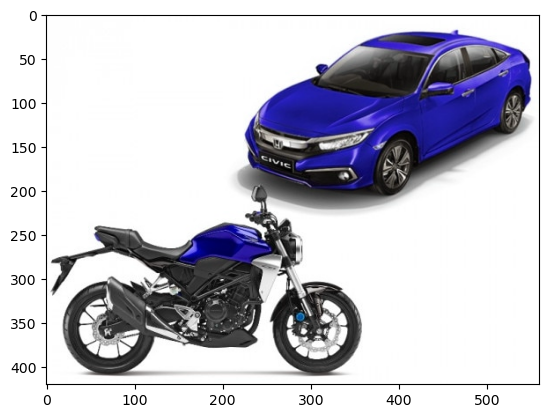

In [8]:
#showing the image
plt.imshow(img)

In [9]:

ClassnIndex,confidece,bbox=model.detect(img,confThreshold=0.5)

In [10]:
print(ClassnIndex)

[4 3]


In [11]:
font_scale=1
font=cv2.FONT_HERSHEY_SIMPLEX
for ClassInd,conf,boxes in zip(ClassnIndex.flatten(),confidece.flatten(),bbox):
    cv2.rectangle(img,boxes,(255,0,0),1)
    cv2.putText(img,labl[ClassInd-1],(boxes[0]+10,boxes[1]+40),font,fontScale=font_scale,
                color=(0,255,0),thickness=1)

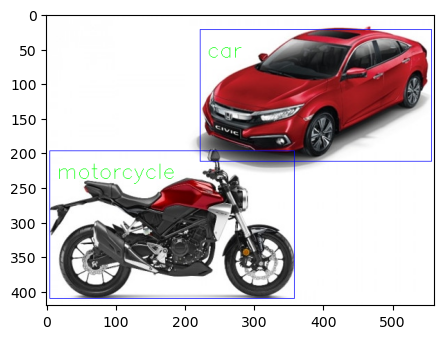

In [12]:
plt.figure(figsize=(5,8))
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))